In [1]:
## Import EDA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
## View dataset

df_ori=pd.read_csv("train.csv")
df=df_ori.copy()  ## make a copy for original one
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Data Visualization

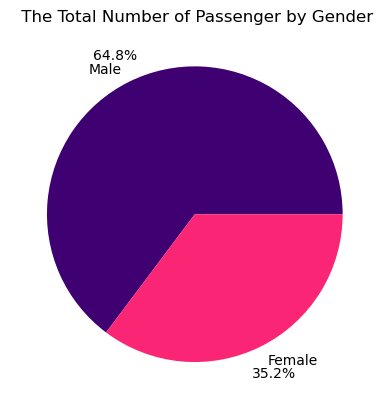

In [5]:
# visualize how many passenger are female and male
count=df["Sex"].value_counts()
count
gender=["Male","Female"]
value=[577,314]
plt.pie(x=value,labels=gender,colors=["#3F0071","#FB2576"],autopct='%1.1f%%',pctdistance=1.2)
plt.title(" The Total Number of Passenger by Gender")
plt.show()

In [6]:
crosstab=pd.crosstab(df["Sex"],df["Survived"])
crosstab



Survived,0,1
Sex,,
female,81,233
male,468,109


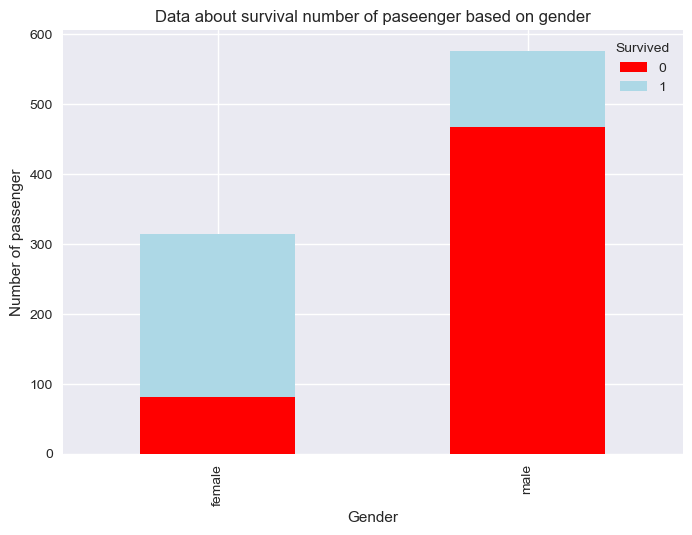

In [7]:
plt.style.use("seaborn")
crosstab.plot(kind="bar",stacked=True,color=["red","lightblue"])
plt.title('Data about survival number of paseenger based on gender')
plt.xlabel('Gender')
plt.ylabel("Number of passenger")
plt.show()

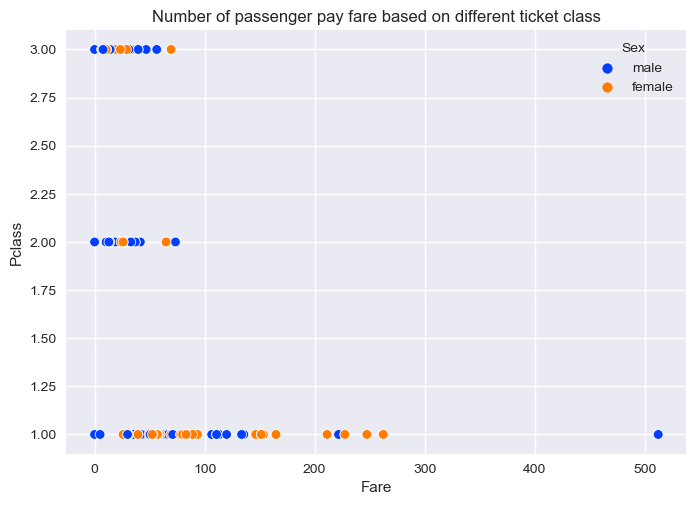

In [8]:
## The relationship between ticket class and fare

sns.scatterplot(data=df,x="Fare",y="Pclass",hue="Sex",palette="bright")
plt.title("Number of passenger pay fare based on different ticket class")
plt.show()

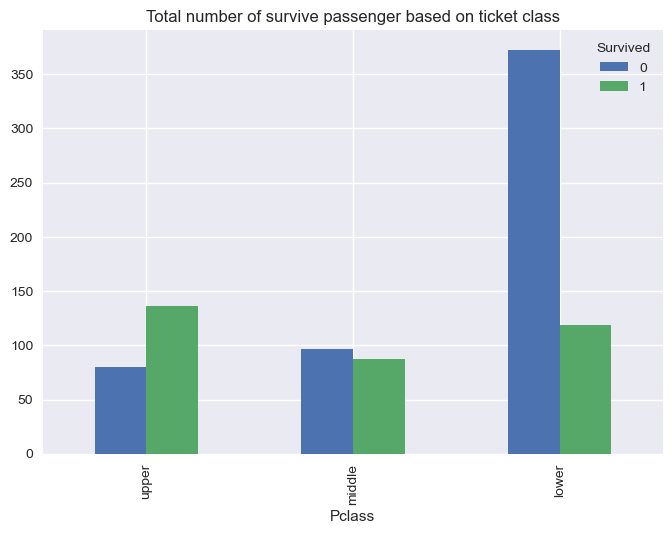

In [9]:
crosstab1=pd.crosstab(df["Pclass"],df["Survived"])
crosstab1.plot(kind="bar")
plt.xticks(ticks=[0,1,2],labels=["upper","middle","lower"])
plt.title('Total number of survive passenger based on ticket class')
plt.show()

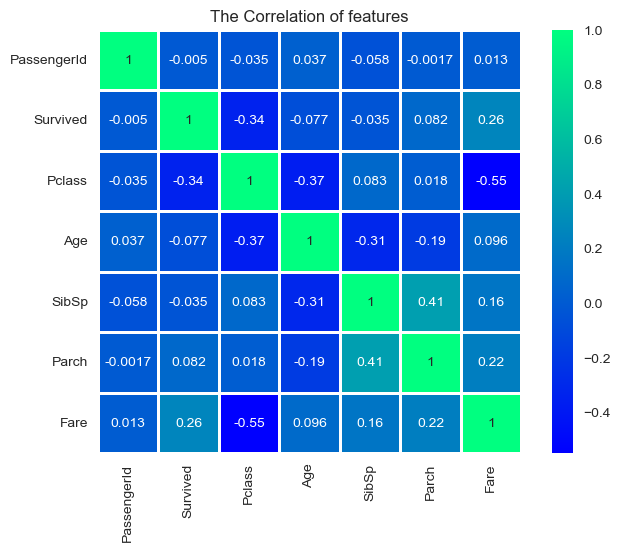

In [10]:
sns.heatmap(df.corr(),annot=True,cmap="winter",square=True,lw=1)
plt.title("The Correlation of features")
plt.show()

## Data Cleaning


In [11]:
df=df.drop("PassengerId",axis=1)


In [12]:
df=df.drop("Name",axis=1)
df=df.drop("Ticket",axis=1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,NaN,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C148,C


In [13]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,NaN,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C148,C


### Check if there is any outlier data value for each column


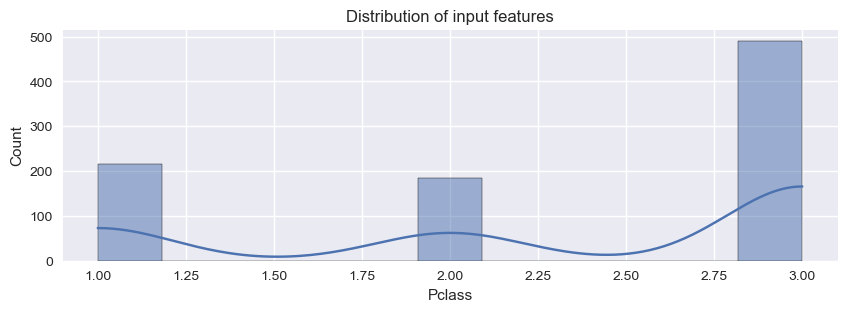

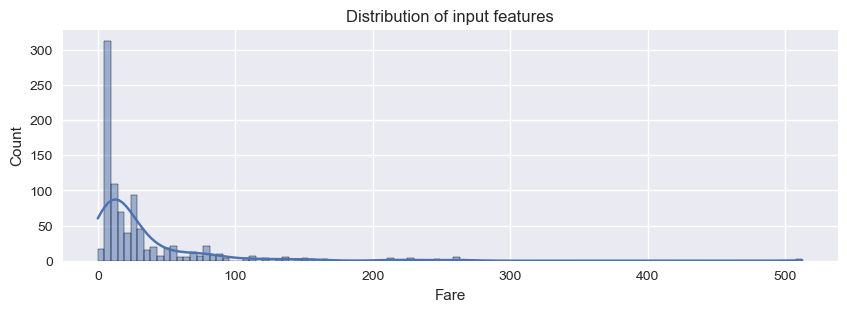

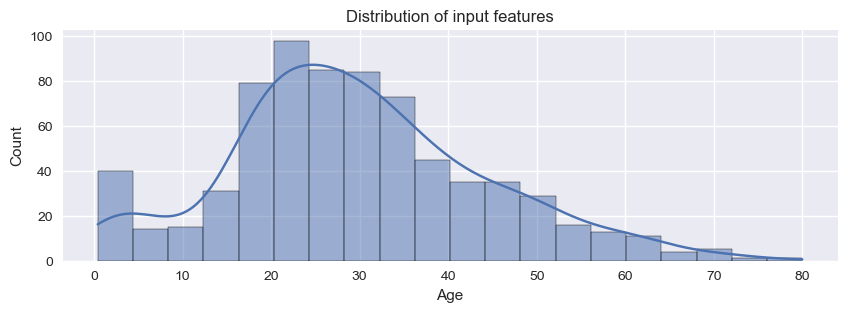

-0.6305479068752845 4.787316519674893 0.38910778230082704


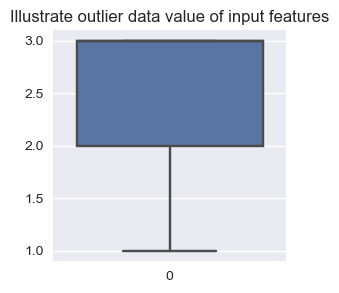

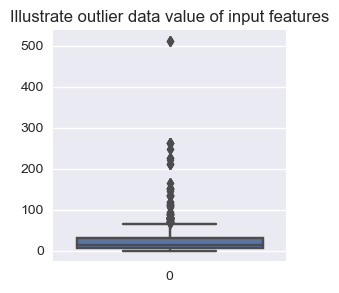

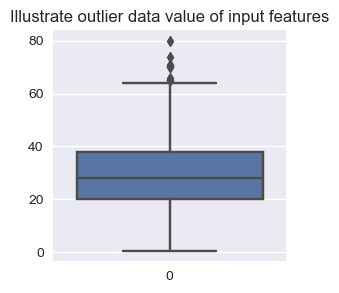

In [14]:

cols_name=["Pclass","Fare","Age"]

for a in cols_name:
    plt.figure(figsize=(10,3))
    sns.histplot(df[a],kde=True)
    plt.title("Distribution of input features")
    plt.show()
    

print(df["Pclass"].skew(),df["Fare"].skew(),df["Age"].skew())    
for a in cols_name:
    plt.figure(figsize=(3,3))
    sns.boxplot(df[a])
    plt.title("Illustrate outlier data value of input features")
    plt.show()

### Convert non-numerical to numerical

In [15]:
for label,content in df.items():
        if pd.api.types.is_string_dtype(content):
            df[label]=content.astype("category").cat.as_ordered()

### Imputation

In [16]:
## filling our numerical data with median

for label,content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df[label]=content.fillna(content.median())

In [17]:
## filling our categorical data 
for label,content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        df[label]=pd.Categorical(content).codes+1

In [18]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,2,22.0,1,0,7.2500,0,3
1,1,1,1,38.0,1,0,71.2833,82,1
2,1,3,1,26.0,0,0,7.9250,0,3
3,1,1,1,35.0,1,0,53.1000,56,3
4,0,3,2,35.0,0,0,8.0500,0,3
...,...,...,...,...,...,...,...,...,...
886,0,2,2,27.0,0,0,13.0000,0,3
887,1,1,1,19.0,0,0,30.0000,31,3
888,0,3,1,28.0,1,2,23.4500,0,3
889,1,1,2,26.0,0,0,30.0000,61,1


### Check missing data by visualization

In [19]:
len(df)

891

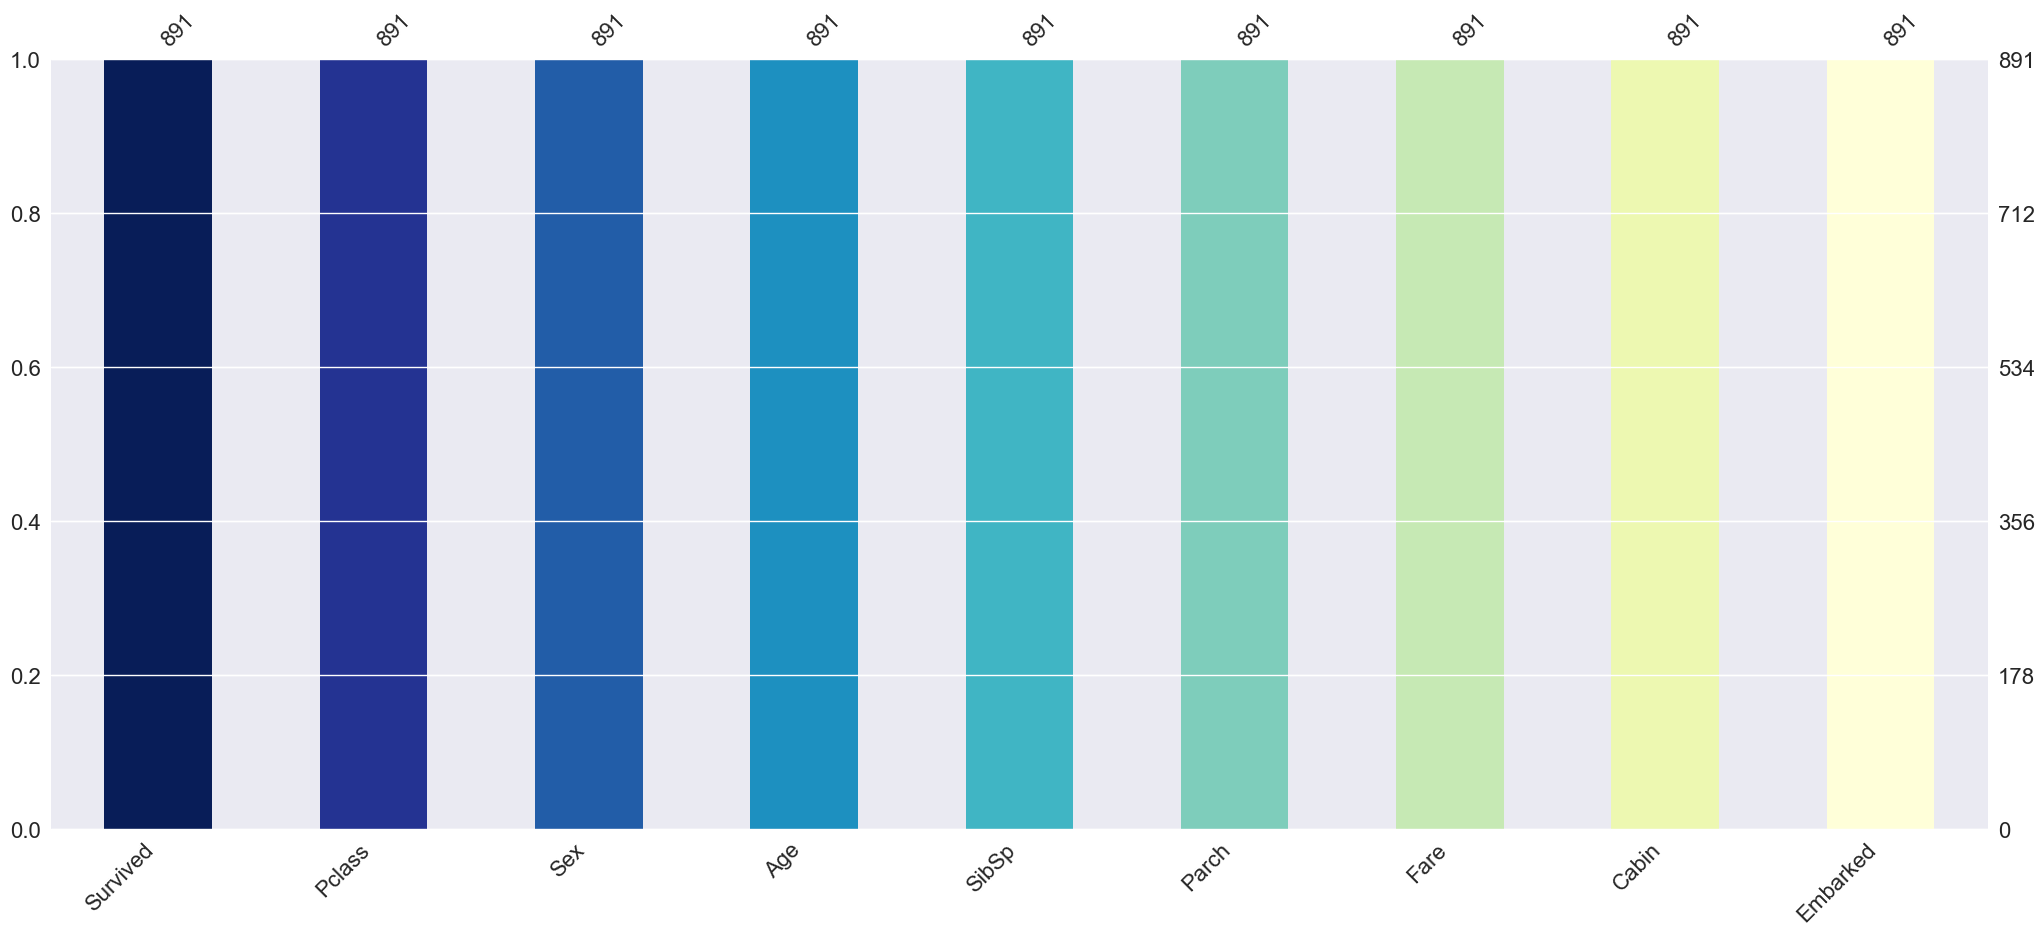

In [20]:
import missingno as msno
num_columns=len(df.columns)
colors=plt.cm.YlGnBu(np.linspace(1,0,num_columns))
msno.bar(df,color=colors)
plt.show()

In [21]:
df_test=pd.read_csv('test.csv')
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [22]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### Data cleaning for Test dataset

In [23]:
df_test=df_test.drop(["PassengerId","Name","Ticket"],axis=1)

In [24]:
df_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,34.5,0,0,7.8292,NaN,Q
1,3,female,47.0,1,0,7.0000,NaN,S
2,2,male,62.0,0,0,9.6875,NaN,Q
3,3,male,27.0,0,0,8.6625,NaN,S
4,3,female,22.0,1,1,12.2875,NaN,S
...,...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,NaN,S
414,1,female,39.0,0,0,108.9000,C105,C
415,3,male,38.5,0,0,7.2500,NaN,S
416,3,male,NaN,0,0,8.0500,NaN,S


### Convert non-numerical to numerical

In [25]:
for label,content in df_test.items():
        if pd.api.types.is_string_dtype(content):
            df_test[label]=content.astype("category").cat.as_ordered()

### Imputation

In [26]:
## filling our numerical data with median

for label,content in df_test.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df_test[label]=content.fillna(content.median())
            
## filling our categorical data 
for label,content in df_test.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_test[label]=pd.Categorical(content).codes+1

In [27]:
df_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,2,34.5,0,0,7.8292,0,2
1,3,1,47.0,1,0,7.0000,0,3
2,2,2,62.0,0,0,9.6875,0,2
3,3,2,27.0,0,0,8.6625,0,3
4,3,1,22.0,1,1,12.2875,0,3
...,...,...,...,...,...,...,...,...
413,3,2,27.0,0,0,8.0500,0,3
414,1,1,39.0,0,0,108.9000,23,1
415,3,2,38.5,0,0,7.2500,0,3
416,3,2,27.0,0,0,8.0500,0,3


## Data Modelling

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,roc_curve,auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [29]:
X_train=df.drop("Survived",axis=1)
y_train=df["Survived"]
X_test=df_test


### Features Scaling


In [30]:
sc=StandardScaler()
X_train_tx=sc.fit_transform(X_train)
X_test_tx=sc.transform(X_test)

### Train a model

In [31]:
#1. RandomForestClassifier

clf=RandomForestClassifier()
clf.fit(X_train,y_train)
y_pred_clf=clf.predict(X_test)

#2. SVM
svc=SVC()
svc.fit(X_train_tx,y_train)
y_pred_svc=svc.predict(X_test_tx)

#3.Knn
knn=KNeighborsClassifier()
knn.fit(X_train_tx,y_train)
y_pred_knn=knn.predict(X_test_tx)

#4.Logistic Regression
reg=LogisticRegression()
reg.fit(X_train_tx,y_train)
y_pred_reg=reg.predict(X_test_tx)

### Comparison of prediction value for all models

In [32]:

compare={ "RandomFC":y_pred_clf,
          "SVC":y_pred_svc,
          "knn":y_pred_knn,
          "LogRegression":y_pred_reg       
}

table_comparison=pd.DataFrame(compare)
table_comparison.head(10) ## show first 10 sample


,RandomFC,SVC,knn,LogRegression
0,0,0,0,0
1,0,1,0,0
2,0,0,0,0
3,1,0,1,0
4,0,0,1,1
5,0,0,0,0
6,0,1,1,1
7,0,0,0,0
8,1,1,1,1
9,0,0,0,0


### Visualize the prediction for 20 samples

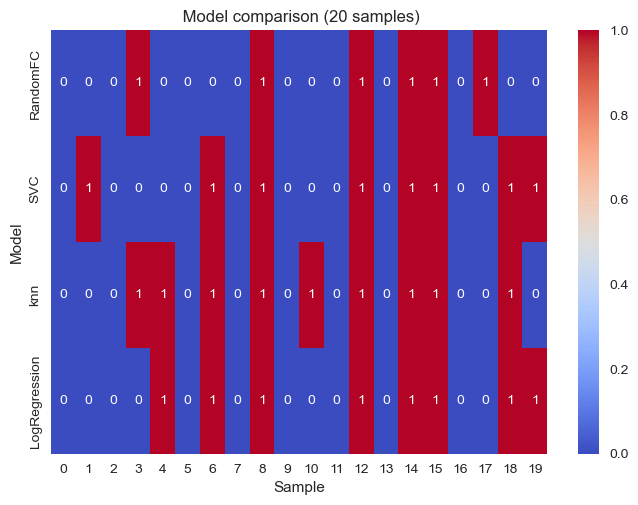

In [33]:
sns.heatmap(table_comparison.iloc[:20].T,cbar=True,annot=True,cmap="coolwarm")
plt.title(' Model comparison (20 samples)')
plt.xlabel("Sample")
plt.ylabel("Model")
plt.show()